In [25]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image 
from StringIO import StringIO
import pydotplus

In [26]:
-

In [27]:
train_df, test_df = titanic("./train.csv", "./test.csv")

In [30]:
clf = tree.DecisionTreeClassifier(random_state=300)
# clf = clf.fit(train_df.iloc[:,1:], train_df.iloc[:,0])
params = {'max_depth': [1,2,3],
         'min_samples_split': [2,3],
         'max_leaf_nodes': [2,3],
          'class_weight': [None, 'balanced'],
         'presort': [True, False],
         'criterion': ['gini', 'entropy'],
         'max_features': [None, 'auto', 'sqrt', 'log2']}

random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter = 255)

random_search = random_search.fit(train_df.iloc[:,1:], train_df.iloc[:,0])

clf = random_search.best_estimator_

In [29]:
train_df = pd.get_dummies(train_df, ["Embarked"])

test_df = pd.get_dummies(test_df, ['Embarked'])

In [43]:
prediction = random_search.predict(test_df.iloc[:, 1:])

In [44]:
df = pd.DataFrame(np.array([test_df['PassengerId'], prediction]).T,columns = ['PassengerId', 'Survived'])

df.to_csv("prediction.csv", index = False)

In [15]:
def visualise_tree(model, features, classes):    
    dot_data = StringIO()
    tree.export_graphviz(model, out_file=dot_data,  
                             feature_names=features,  
                             class_names=classes,  
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())


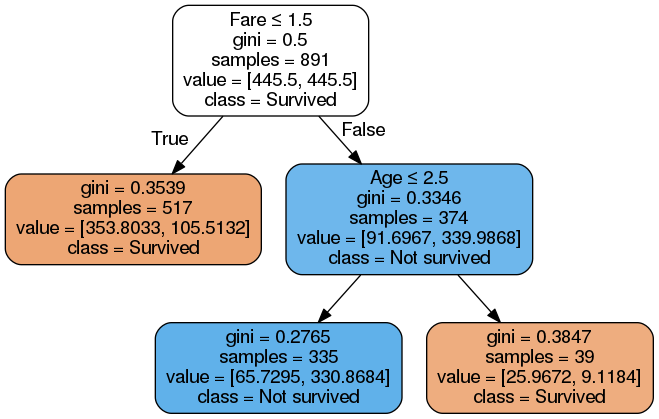

In [31]:
visualise_tree(clf, train_df.columns, ['Survived', 'Not survived'])